In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/err-csv/error_data_csv.csv
/kaggle/input/randomcode/code.txt
/kaggle/input/code-errors/code_error.txt


In [2]:
#importing all the necessary libraries

!pip install sentence-transformers
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sentence_transformers
from sentence_transformers import SentenceTransformer
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=31c2c7ca8eb18112fc470f56020fd05b5c008a7f0da30819bbb52fcbd557d1d2
  Stored in directory: /root/.cache/pip/wheels/83/71/2b/40d17d21937fed496fb99145227eca8f20b4891240ff60c86f
Successfully built sentence-transformers


In [3]:
#importing the dataset
#displaying the details of the imported dataset
data_df = pd.read_csv(r'/kaggle/input/err-csv/error_data_csv.csv')
print(data_df.info())
print('******************************')
print('Shape of the data : ')
print(data_df.shape)
print('******************************')
print(data_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sl. No             71 non-null     int64 
 1   Error Description  71 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB
None
******************************
Shape of the data : 
(71, 2)
******************************
   Sl. No                                  Error Description
0       1  ERROR VCP2571 "Instantiations must have bracke...
1       2  ERROR VCP2571 "Instantiations must have bracke...
2       3  ERROR VCP2571 "Instantiations must have bracke...
3       4  ERROR VCP2571 "Instantiations must have bracke...
4       5  ERROR VCP2571 "Instantiations must have bracke...


In [4]:
#preprocessing the raw data
#transforming into clean data
reduced_data = []
for i in range(0,data_df.shape[0]):
    line = data_df['Error Description'].iloc[i]
    line = line.lower()
    line = re.sub(r'\d+', '', line)
    translator = str.maketrans('', '', string.punctuation)
    line = line.translate(translator)
    line = " ".join(line.split())
    reduced_data.append(line)
    print(line)

error vcp instantiations must have brackets hresp testbenchsv
error vcp instantiations must have brackets hrdata testbenchsv
error vcp instantiations must have brackets hready testbenchsv
error vcp instantiations must have brackets prdata testbenchsv
error vcp instantiations must have brackets psel testbenchsv
error vcp instantiations must have brackets penable testbenchsv
error vcp instantiations must have brackets paddr testbenchsv
error vcp instantiations must have brackets pwrite testbenchsv
error vcp syntax error unexpected token testbenchsv
error vcp modulemacromoduleendmodule pairs mismatch detected endmodule tokens are missing testbenchsv
error vcp syntax error unexpected token designsv
error vcp modulemacromoduleendmodule pairs mismatch detected endmodule tokens are missing testbenchsv
error vcp syntax error unexpected token endend testbenchsv
error vcp syntax error unexpected token bidentifier testbenchsv
error vcp syntax error unexpected token voidvoid
error vcp string const

In [5]:
#adding the column of clean data in the actual dataframe beside raw data
data_df["Clean data"] = reduced_data
#converting the clean data lines to numerical vectors
embedder = SentenceTransformer('distilbert-base-nli-mean-tokens')
reduced_data_embeddings = embedder.encode(reduced_data)
#displaying the original dataframe with the added clean data column
print(data_df.head())
print('***************************************************')
#displaying the numerical feature vectors
print('Numerical feature arrays :')
print(reduced_data_embeddings)
print('shape of the numerical feature array :')
print(reduced_data_embeddings.shape)

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

   Sl. No                                  Error Description  \
0       1  ERROR VCP2571 "Instantiations must have bracke...   
1       2  ERROR VCP2571 "Instantiations must have bracke...   
2       3  ERROR VCP2571 "Instantiations must have bracke...   
3       4  ERROR VCP2571 "Instantiations must have bracke...   
4       5  ERROR VCP2571 "Instantiations must have bracke...   

                                          Clean data  
0  error vcp instantiations must have brackets hr...  
1  error vcp instantiations must have brackets hr...  
2  error vcp instantiations must have brackets hr...  
3  error vcp instantiations must have brackets pr...  
4  error vcp instantiations must have brackets ps...  
***************************************************
Numerical feature arrays :
[[-0.6407397   0.06565557  0.33610117 ... -0.6179526   0.2909134
   0.07429865]
 [-0.6048836   0.10567376  0.37357318 ... -0.4875803   0.27248925
   0.24101843]
 [-0.62116086  0.11403541  0.19604348 ... -0.

Text(0, 0.5, 'inertia')

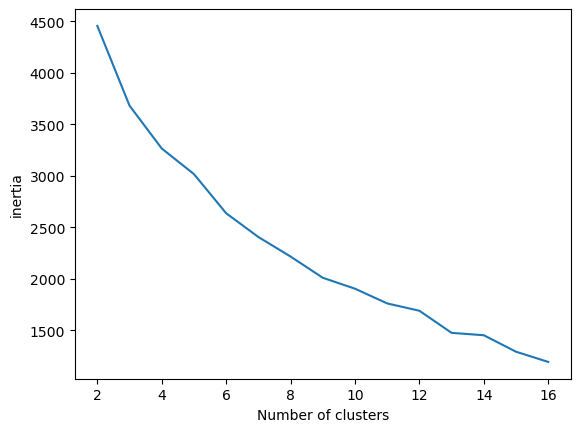

In [6]:
#finding the ideal number of clusters using Elbow method
scores=[]
for i in range(15):
    scores.append(KMeans(n_clusters=i+2).fit(reduced_data_embeddings).inertia_) 
x=np.arange(2,17)
plt.plot(x,scores)
plt.xlabel('Number of clusters')
plt.ylabel('inertia')

In [7]:
#from the Graph, the optimal number of clusters can be taken as 6 from the elbow method
#applying the clustering algorithm
num_of_clusters = 6
cl_model = KMeans(n_clusters=num_of_clusters)
cl_model.fit(reduced_data_embeddings)
labels = cl_model.labels_
#adding the cluster column to the original dataframe
data_df['cluster']=cl_model.labels_
print(data_df.head())

   Sl. No                                  Error Description  \
0       1  ERROR VCP2571 "Instantiations must have bracke...   
1       2  ERROR VCP2571 "Instantiations must have bracke...   
2       3  ERROR VCP2571 "Instantiations must have bracke...   
3       4  ERROR VCP2571 "Instantiations must have bracke...   
4       5  ERROR VCP2571 "Instantiations must have bracke...   

                                          Clean data  cluster  
0  error vcp instantiations must have brackets hr...        3  
1  error vcp instantiations must have brackets hr...        3  
2  error vcp instantiations must have brackets hr...        3  
3  error vcp instantiations must have brackets pr...        3  
4  error vcp instantiations must have brackets ps...        3  


In [8]:
#sorting the dataset by cluster values
#displaying the content of separate clusters
rslt_df = data_df.sort_values(by = 'cluster')
clus = 0
count = 0
cluster_length = []
print('Contents of cluster '+str(clus))

for i in range(0,rslt_df.shape[0]):
    if rslt_df['cluster'].iloc[i]==clus :
        print(rslt_df['Error Description'].iloc[i])
        count = count + 1
    else :
        clus = clus + 1
        print('**************************************************************')
        print('Contents of cluster '+str(clus))
        print(rslt_df['Error Description'].iloc[i])
        cluster_length.append(count)
        count=1
cluster_length.append(count)

Contents of cluster 0
# ELBREAD: Error: Elaboration process completed with errors.
ELAB2: Fatal Error: ELAB2_0036 Unresolved hierarchical reference to "monitor./4/" from module "prientb"
ELAB2: Fatal Error: ELAB2_0036 Unresolved hierarchical reference
Error: Fatal error occurred during simulation.
ERROR VCP2020 "begin...end pair(s) mismatch detected.
ERROR VCP2020 "begin...end pair(s) mismatch detected.
# ELBREAD: Error: Elaboration process completed with errors.
**************************************************************
Contents of cluster 1
# VSIM: Error: Library `testbench' is either damaged or does not exist.
ERROR VCP5236 "Class constructor used for object different from class or covergroup object
ERROR VCP2020 "module/macromodule...endmodule pair(s) mismatch detected. 1 <endmodule> tokens are missing." "testbench.sv" 13  3
ERROR VCP2020 "begin...end pair(s) mismatch detected. 1 <end> tokens are missing."
ERROR VCP2890 "Unspecified argument is used for an argument that does no

In [9]:
#printing the details of the error clusters
print('Details about the error clusters :')
print('*******************************************************')
for i in range(0,num_of_clusters):
    print('Number of errors in cluster '+str(i)+' : '+str(cluster_length[i]))
    print('-----------------------------------------------------')

Details about the error clusters :
*******************************************************
Number of errors in cluster 0 : 7
-----------------------------------------------------
Number of errors in cluster 1 : 13
-----------------------------------------------------
Number of errors in cluster 2 : 20
-----------------------------------------------------
Number of errors in cluster 3 : 14
-----------------------------------------------------
Number of errors in cluster 4 : 7
-----------------------------------------------------
Number of errors in cluster 5 : 10
-----------------------------------------------------


In [10]:
#importing some extra libraries
from nltk import tokenize
from operator import itemgetter
import math
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))



In [11]:
#extracting the frequently occuring words from the clusters

for i in range(0,num_of_clusters):
    print("Frequently occuring words (top 5) in cluster "+str(i)+" :")
    print("------------------------------------------------------------")
    cluster_any_df = rslt_df[rslt_df.cluster==i]
    cluster_any_String = ""
    for k in range(0,cluster_any_df.shape[0]):
        cluster_any_String = cluster_any_String + str(cluster_any_df['Clean data'].iloc[k]) + str(" ")

    total_words = word_tokenize(cluster_any_String)
    tf_score = {}
    total_word_length = len(total_words)
    for each_word in total_words:
        each_word = each_word.replace('.','')
        if each_word not in stop_words:
            if each_word in tf_score:
                tf_score[each_word]+=1
            else:
                tf_score[each_word] = 1

    tf_score.update((x,y/int(total_word_length)) for x, y in tf_score.items())
    #print(tf_score)
    sorted_tf_score = dict(sorted(tf_score.items(), key=lambda item: item[1],reverse=True))
    #print(tf_score.keys())
    #print(tf_score)
    
    keys = list(sorted_tf_score.keys())
    print(keys[0:5])
    print("------------------------------------------------------------")

Frequently occuring words (top 5) in cluster 0 :
------------------------------------------------------------
['error', 'elab', 'fatal', 'elbread', 'elaboration']
------------------------------------------------------------
Frequently occuring words (top 5) in cluster 1 :
------------------------------------------------------------
['error', 'vcp', 'pairs', 'mismatch', 'detected']
------------------------------------------------------------
Frequently occuring words (top 5) in cluster 2 :
------------------------------------------------------------
['error', 'vcp', 'syntax', 'unexpected', 'token']
------------------------------------------------------------
Frequently occuring words (top 5) in cluster 3 :
------------------------------------------------------------
['vcp', 'error', 'must', 'instantiations', 'brackets']
------------------------------------------------------------
Frequently occuring words (top 5) in cluster 4 :
-----------------------------------------------------------

In [12]:
#extracting error line number and error index 
newline = data_df['Error Description'].iloc[0]
newline=newline.lower()
translator = str.maketrans('', '', string.punctuation)
newline = newline.translate(translator)
newline = " ".join(newline.split())
wordarr = word_tokenize(newline)
line_number = wordarr[len(wordarr)-2]
line_index = wordarr[len(wordarr)-1]
print(line_number)
print(line_index)


141
15


In [13]:
#training labelled data for classifying new errors
#preparing a dataset with reduced data embeddings and respective cluster
cluster_data = pd.DataFrame(reduced_data_embeddings)
cluster_data['cluster']=cl_model.labels_
cluster_data.head()

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,cluster
0,-0.640740,0.065656,0.336101,-0.449161,-0.482500,-0.573191,1.214181,0.087242,0.165616,-0.383394,...,0.091232,0.821459,0.227901,-0.216106,0.043409,-0.101590,-0.617953,0.290913,0.074299,3
1,-0.604884,0.105674,0.373573,-0.503979,-0.572464,-0.575996,1.172135,0.188612,0.161258,-0.306234,...,0.032949,0.752729,0.213689,-0.260615,0.101417,-0.095097,-0.487580,0.272489,0.241018,3
2,-0.621161,0.114035,0.196043,-0.570700,-0.532596,-0.574631,1.090527,0.176380,0.064388,-0.100484,...,0.129532,0.669338,0.336005,-0.199232,-0.029763,0.061093,-0.494160,0.317712,0.163673,3
3,-0.627280,0.135785,0.335450,-0.389667,-0.723238,-0.630535,1.091419,0.200994,0.042973,-0.199728,...,0.015988,0.685904,0.286641,-0.224561,0.121348,0.035719,-0.314490,0.238912,0.418648,3
4,-0.632835,0.059254,0.335887,-0.315037,-0.619819,-0.555821,1.045145,0.147139,-0.028660,-0.162090,...,0.056911,0.695129,0.389005,-0.210353,0.108734,0.181934,-0.458222,0.222428,0.181302,3


In [14]:
#training the data using a classification model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
x = cluster_data.drop('cluster', axis=1)
y = cluster_data['cluster']
x_train, x_test, y_train, y_test = train_test_split(x,y ,random_state=42,test_size=0.1,shuffle=True)
lr = LogisticRegression(max_iter=800,random_state=0)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
score = accuracy_score(y_test, y_pred)
print(score)

1.0


In [15]:
#importing and preprocessing the new error lines
file = open(r'/kaggle/input/code-errors/code_error.txt')
# read the file as a list
err_data = file.readlines()
# close the file
file.close()

print(err_data)

['ERROR VCP2000 "Syntax error. Unexpected token: ]." "design.sv" 17\xa0 11\n', 'ERROR VCP2567 "Undefined direction of port s." "design.sv" 15\xa0 19\n', 'ERROR VCP2000 "Syntax error. Unexpected token: 1\'b1[_1b1]." "design.sv" 10\xa0 13\n', 'ERROR VCP2000 "Syntax error. Unexpected token: or[_OR]." "design.sv" 6\xa0 13']


In [16]:
#removing the unwanted characters from the code input
error_data_cleaned = []
for sub in err_data:
    sub = sub.replace("\n", "")
    sub = sub.replace("\xa0"," ")
    error_data_cleaned.append(sub)
    print (sub)



ERROR VCP2000 "Syntax error. Unexpected token: ]." "design.sv" 17  11
ERROR VCP2567 "Undefined direction of port s." "design.sv" 15  19
ERROR VCP2000 "Syntax error. Unexpected token: 1'b1[_1b1]." "design.sv" 10  13
ERROR VCP2000 "Syntax error. Unexpected token: or[_OR]." "design.sv" 6  13


In [17]:
#analyzing the input code
# open the data file
file = open(r'/kaggle/input/randomcode/code.txt')
# read the file as a list
code_data = file.readlines()
# close the file
file.close()

print(code_data)

['module mux_2x1(i,s,y);\n', '\xa0 input [0:1]i;\n', '\xa0 input s;\n', '\xa0 output reg y;\n', '\n', '\xa0 always @(s or i)\n', '\xa0\xa0\xa0 begin\n', '\xa0\xa0\xa0\xa0\xa0 case(s)\n', "\xa0\xa0\xa0\xa0\xa0\xa0\xa0 1'b0:y=i[0];\n", "\xa0\xa0\xa0\xa0\xa0\xa0\xa0 1'b1:y=i[1];\n", '\xa0\xa0\xa0\xa0\xa0 endcase\n', '\xa0\xa0\xa0 end\n', 'endmodule\n', '\n', '\xa0\n', '\n', 'module mux_16_1(i,s,y);\n', '\xa0 input [0:15]i;\n', '\xa0 input [3:0]s;\n', '\xa0 output y;\n', '\xa0 wire [0:13]w;\n', '\n', '\xa0 mux_2x1 p1(i[0:1],s[0],w[0]);\n', '\xa0 mux_2x1 p2(i[2:3],s[0],w[1]);\n', '\xa0 mux_2x1 p3(i[4:5],s[0],w[2]);\n', '\xa0 mux_2x1 p4(i[6:7],s[0],w[3]);\n', '\xa0 mux_2x1 p5(i[8:9],s[0],w[4]);\n', '\xa0 mux_2x1 p6(i[10:11],s[0],w[5]);\n', '\xa0 mux_2x1 p7(i[12:13],s[0],w[6]);\n', '\xa0 mux_2x1 p8(i[14:15],s[0],w[7]);\n', '\xa0 mux_2x1 p9(w[0:1],s[1],w[8]);\n', '\xa0 mux_2x1 p10(w[2:3],s[1],w[9]);\n', '\xa0 mux_2x1 p11(w[4:5],s[1],w[10]);\n', '\xa0 mux_2x1 p12(w[6:7],s[1],w[11]);\n', '\xa0 m

In [24]:
#removing the unwanted characters from the code input
code_data_cleaned = []
for sub in code_data:
    sub = sub.replace("\n", "")
    sub = sub.replace("\xa0"," ")
    code_data_cleaned.append(sub)
    print (sub)



module mux_2x1(i,s,y);
  input [0:1]i;
  input s;
  output reg y;

  always @(s or i)
    begin
      case(s)
        1'b0:y=i[0];
        1'b1:y=i[1];
      endcase
    end
endmodule

 

module mux_16_1(i,s,y);
  input [0:15]i;
  input [3:0]s;
  output y;
  wire [0:13]w;

  mux_2x1 p1(i[0:1],s[0],w[0]);
  mux_2x1 p2(i[2:3],s[0],w[1]);
  mux_2x1 p3(i[4:5],s[0],w[2]);
  mux_2x1 p4(i[6:7],s[0],w[3]);
  mux_2x1 p5(i[8:9],s[0],w[4]);
  mux_2x1 p6(i[10:11],s[0],w[5]);
  mux_2x1 p7(i[12:13],s[0],w[6]);
  mux_2x1 p8(i[14:15],s[0],w[7]);
  mux_2x1 p9(w[0:1],s[1],w[8]);
  mux_2x1 p10(w[2:3],s[1],w[9]);
  mux_2x1 p11(w[4:5],s[1],w[10]);
  mux_2x1 p12(w[6:7],s[1],w[11]);
  mux_2x1 p13(w[8:9],s[2],w[12]);
  mux_2x1 p14(w[10:11],s[2],w[13]);
  mux_2x1 p15(w[12:13],s[3],y);

endmodule


In [19]:
reduced_err_data = []
for i in error_data_cleaned:
    i = i.lower()
    i = re.sub(r'\d+', '', i)
    translator = str.maketrans('', '', string.punctuation)
    i = i.translate(translator)
    i = " ".join(i.split())
    reduced_err_data.append(i)
    print(i)

reduced_err_data_embeddings = embedder.encode(reduced_err_data)

error vcp syntax error unexpected token designsv
error vcp undefined direction of port s designsv
error vcp syntax error unexpected token bb designsv
error vcp syntax error unexpected token oror designsv


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
cluster_decisions = lr.predict(reduced_err_data_embeddings)
index=0
for i in error_data_cleaned:
    print(i+"   ------------->"+" Cluster "+str(cluster_decisions[index]))
    index+=1


ERROR VCP2000 "Syntax error. Unexpected token: ]." "design.sv" 17  11   -------------> Cluster 2
ERROR VCP2567 "Undefined direction of port s." "design.sv" 15  19   -------------> Cluster 3
ERROR VCP2000 "Syntax error. Unexpected token: 1'b1[_1b1]." "design.sv" 10  13   -------------> Cluster 2
ERROR VCP2000 "Syntax error. Unexpected token: or[_OR]." "design.sv" 6  13   -------------> Cluster 2


In [21]:
#grouping the error indexes
err_line_no = []
err_index = []
for i in error_data_cleaned:
    
    i=i.lower()
    translator = str.maketrans('', '', string.punctuation)
    i = i.translate(translator)
    i = " ".join(i.split())
    wordarr = word_tokenize(i)
    line_number = wordarr[len(wordarr)-2]
    line_index = wordarr[len(wordarr)-1]
    err_line_no.append(line_number)
    err_index.append(line_index)

print(err_line_no)
print("---------------------")
print(err_index)

['17', '15', '10', '6']
---------------------
['11', '19', '13', '13']


In [23]:
!pip install colorama
from colorama import Fore, Back, Style

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [26]:

for i in range(len(err_index)):
    code_string = code_data_cleaned[int(err_line_no[i])]
    sub1 = code_string[0:int(err_index[i])]
    if(len(code_string)<=int(err_index[i])):
        code_data_cleaned[int(err_line_no[i])] = sub1 + Fore.RED + " |error| "+Style.RESET_ALL
    else:
        sub2 = code_string[int(err_index[i])]
        code_data_cleaned[int(err_line_no[i])] = sub1 + Fore.RED + " |error| "+ Style.RESET_ALL + sub2
    

#pointing out errors in the code
for sub in code_data_cleaned:
    print (sub)

module mux_2x1(i,s,y);
  input [0:1]i;
  input s;
  output reg y;

  always @(s or i)
    begin |error| 
      case(s)
        1'b0:y=i[0];
        1'b1:y=i[1];
      endcase |error| 
    end
endmodule

 
 |error| 
module mux_16_1(i,s,y);
  input [0: |error| 1
  input [3:0]s;
  output y;
  wire [0:13]w;

  mux_2x1 p1(i[0:1],s[0],w[0]);
  mux_2x1 p2(i[2:3],s[0],w[1]);
  mux_2x1 p3(i[4:5],s[0],w[2]);
  mux_2x1 p4(i[6:7],s[0],w[3]);
  mux_2x1 p5(i[8:9],s[0],w[4]);
  mux_2x1 p6(i[10:11],s[0],w[5]);
  mux_2x1 p7(i[12:13],s[0],w[6]);
  mux_2x1 p8(i[14:15],s[0],w[7]);
  mux_2x1 p9(w[0:1],s[1],w[8]);
  mux_2x1 p10(w[2:3],s[1],w[9]);
  mux_2x1 p11(w[4:5],s[1],w[10]);
  mux_2x1 p12(w[6:7],s[1],w[11]);
  mux_2x1 p13(w[8:9],s[2],w[12]);
  mux_2x1 p14(w[10:11],s[2],w[13]);
  mux_2x1 p15(w[12:13],s[3],y);

endmodule
